In [1]:
import cv2 
import glob
import os
from tqdm import tqdm

In [2]:
folders = glob.glob("./Data/*")
folders = sorted(folders)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
PADDING = 10

data_counting = {}

crop_counting = {}

for folder in folders:
  print(f"==== PROCESSING {folder}")
  imgs = glob.glob(f"{folder}/*")
  os.makedirs(f"./CropImages/{os.path.basename(folder)}")
  i = 0

  data_counting[folder.split('/')[-1]] = len(imgs)
  crop_counting[folder.split('/')[-1]] = 0

  for img_path in tqdm(imgs):
    # Read the input image 
    img = cv2.imread(img_path)
    # Convert into grayscale 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    # Load the cascade 

    # Detect faces 
    faces = face_cascade.detectMultiScale(gray, 1.1, 30) 
    
    crop_counting[folder.split('/')[-1]] += len(faces)

    # Draw rectangle around the faces and crop the faces 
    for (x, y, w, h) in faces:
      miny = max(y-PADDING, 0)
      maxy = min(y + h + PADDING, img.shape[0])
      minx = max(x-PADDING, 0)
      maxx = min(x + w + PADDING, img.shape[1])
      face = img[miny:maxy:, minx:maxx]
      face = cv2.resize(face, (128,128))
      cv2.imwrite(f'CropImages/{os.path.basename(folder)}/{i}.jpg', face)
      i += 1

==== PROCESSING ./Data/Andiez


100%|██████████| 70/70 [00:04<00:00, 17.30it/s]


==== PROCESSING ./Data/Bảo Anh


100%|██████████| 70/70 [00:05<00:00, 12.08it/s]


==== PROCESSING ./Data/Bảo Thy


100%|██████████| 70/70 [00:08<00:00,  8.18it/s]


==== PROCESSING ./Data/Cát Phượng


100%|██████████| 70/70 [00:07<00:00,  9.26it/s]


==== PROCESSING ./Data/Gào


100%|██████████| 70/70 [00:07<00:00,  9.18it/s]


==== PROCESSING ./Data/H'Hen Niê


100%|██████████| 70/70 [00:07<00:00,  8.80it/s]


==== PROCESSING ./Data/Hân


100%|██████████| 70/70 [00:10<00:00,  6.72it/s]


==== PROCESSING ./Data/Nguyễn Ngọc Nữ


100%|██████████| 70/70 [00:08<00:00,  8.04it/s]


==== PROCESSING ./Data/Nguyễn Trần Trung Quân


100%|██████████| 70/70 [00:07<00:00,  9.31it/s]


==== PROCESSING ./Data/Nguyễn Tú Linh


100%|██████████| 70/70 [00:04<00:00, 14.89it/s]


==== PROCESSING ./Data/OnLyC


100%|██████████| 70/70 [00:07<00:00,  9.43it/s]


==== PROCESSING ./Data/Quang Hải


100%|██████████| 70/70 [00:07<00:00,  8.76it/s]


==== PROCESSING ./Data/Salim


100%|██████████| 70/70 [00:06<00:00, 10.72it/s]


==== PROCESSING ./Data/Shin Jin Ju


100%|██████████| 70/70 [00:07<00:00,  9.09it/s]


==== PROCESSING ./Data/Thủy Tiên


100%|██████████| 70/70 [00:07<00:00,  9.94it/s]


==== PROCESSING ./Data/Trấn Thành


100%|██████████| 70/70 [00:07<00:00,  9.38it/s]


==== PROCESSING ./Data/Trịnh Thăng Bình


100%|██████████| 70/70 [00:08<00:00,  8.05it/s]


==== PROCESSING ./Data/Uyên Linh


100%|██████████| 70/70 [00:06<00:00, 11.17it/s]


==== PROCESSING ./Data/Will


100%|██████████| 70/70 [00:05<00:00, 11.68it/s]


==== PROCESSING ./Data/Xuân Bắc


100%|██████████| 70/70 [00:02<00:00, 24.46it/s]


In [3]:
import matplotlib.pyplot as plt

def plot_bar_data(category:str, value:str, title:str, data:dict):
    categories = list(data.keys())
    values = list(data.values())

    plt.bar(categories, values)
    plt.xlabel(category)
    plt.xticks(rotation = 90)
    plt.ylabel(value)
    plt.title(title)
    plt.show()

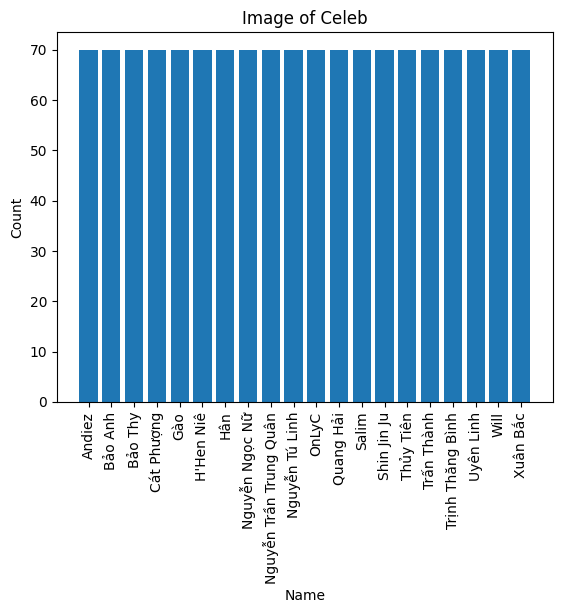

In [4]:
plot_bar_data('Name','Count','Image of Celeb', data_counting)

In [5]:
print(crop_counting)

{'Andiez': 80, 'Bảo Anh': 47, 'Bảo Thy': 66, 'Cát Phượng': 140, 'Gào': 10, "H'Hen Niê": 52, 'Hân': 79, 'Nguyễn Ngọc Nữ': 62, 'Nguyễn Trần Trung Quân': 61, 'Nguyễn Tú Linh': 7, 'OnLyC': 23, 'Quang Hải': 111, 'Salim': 144, 'Shin Jin Ju': 43, 'Thủy Tiên': 34, 'Trấn Thành': 178, 'Trịnh Thăng Bình': 15, 'Uyên Linh': 60, 'Will': 21, 'Xuân Bắc': 133}


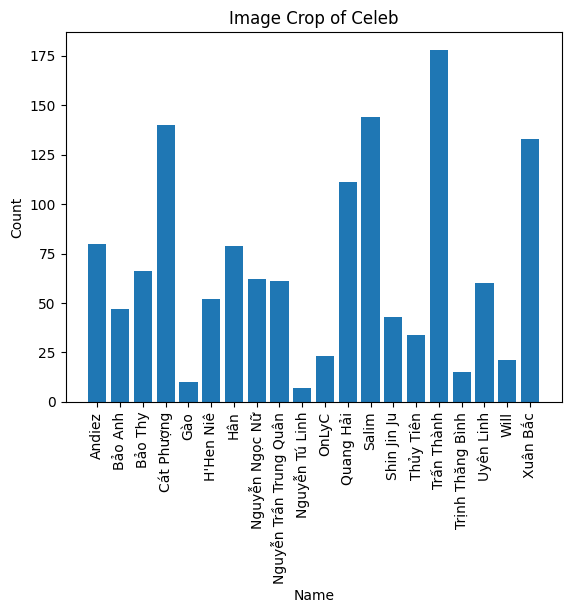

In [6]:
plot_bar_data('Name','Count','Image Crop of Celeb', crop_counting)

In [7]:
import compare_faces

In [21]:
crop_images_celebs = glob.glob("./CropImages/*")
crop_images_celebs = sorted(crop_images_celebs)

sample_image = "sample.jpg"

for celeb in crop_images_celebs:
    sample_path = celeb + "/" + sample_image
    print(f"==== PROCESSING {celeb}")
    imgs = glob.glob(f"{celeb}/*")
    os.makedirs(f"./Filter/{os.path.basename(celeb)}")
    i = 0
    count = 0
    print(imgs)
    for img_path in tqdm(imgs):
        if not img_path.endswith("sample.jpg"):
            diff = compare_faces.run(f"{os.path.dirname(img_path)}/{sample_image}", img_path)
            if diff < 0.7:
                img = cv2.imread(img_path)
                cv2.imwrite(f'Filter/{os.path.basename(celeb)}/{count}.jpg', img)
                count += 1

In [9]:
import csv
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("AgeAnnotations.csv", encoding='utf-8')

df[df.Name == "Bảo Anh"].Age.values[0]

31

In [18]:
filtered_images_celebs = glob.glob("./Result/*")
filtered_images_celebs = sorted(filtered_images_celebs)

count_follow_age = {
}
    
count_filtered = {

}

for celeb_name in filtered_images_celebs:
    print(f"==== PROCESSING {celeb_name}")
    imgs = glob.glob(f"{celeb_name}/*")
    name = celeb_name.split('/')[-1]
    count_filtered[name] = len(imgs)
    try:
        age = df[df.Name == name].Age.values[0]
        age_range = str(int(age/5)*5)+'-'+str((int(age/5)+1)*5)
        print(name+" "+str(age))

        try:
            os.makedirs(f"./Merged/{os.path.basename(age_range)}")
            count = 0
        except Exception:
            count = count_follow_age[age_range]
            print(f"Folder {age_range} has been created.")
        for img_path in tqdm(imgs):
            img = cv2.imread(img_path)
            cv2.imwrite(f'Merged/{os.path.basename(age_range)}/{count}.jpg', img)
            count += 1
        count_follow_age[age_range] = count

    except:
        print("AgeNotFound!")
    
print(count_follow_age)

==== PROCESSING ./Result/Andiez
Andiez 28
AgeNotFound!
==== PROCESSING ./Result/Bảo Anh
Bảo Anh 31
AgeNotFound!
==== PROCESSING ./Result/Bảo Thy
Bảo Thy 35
AgeNotFound!
==== PROCESSING ./Result/Cát Phượng
Cát Phượng 53
AgeNotFound!
==== PROCESSING ./Result/Gào
Gào 35
AgeNotFound!
==== PROCESSING ./Result/H'Hen Niê
H'Hen Niê 31
AgeNotFound!
==== PROCESSING ./Result/Hân
Hân 38
AgeNotFound!
==== PROCESSING ./Result/Nguyễn Ngọc Nữ
Nguyễn Ngọc Nữ 29
AgeNotFound!
==== PROCESSING ./Result/Nguyễn Trần Trung Quân
Nguyễn Trần Trung Quân 30
AgeNotFound!
==== PROCESSING ./Result/Nguyễn Tú Linh
Nguyễn Tú Linh 32
AgeNotFound!
==== PROCESSING ./Result/OnLyC
OnLyC 35
AgeNotFound!
==== PROCESSING ./Result/Quang Hải
Quang Hải 26
AgeNotFound!
==== PROCESSING ./Result/Salim
Salim 31
AgeNotFound!
==== PROCESSING ./Result/Shin Jin Ju
Shin Jin Ju 28
AgeNotFound!
==== PROCESSING ./Result/Thủy Tiên
Thủy Tiên 37
AgeNotFound!
==== PROCESSING ./Result/Trấn Thành
Trấn Thành 36
AgeNotFound!
==== PROCESSING ./Result

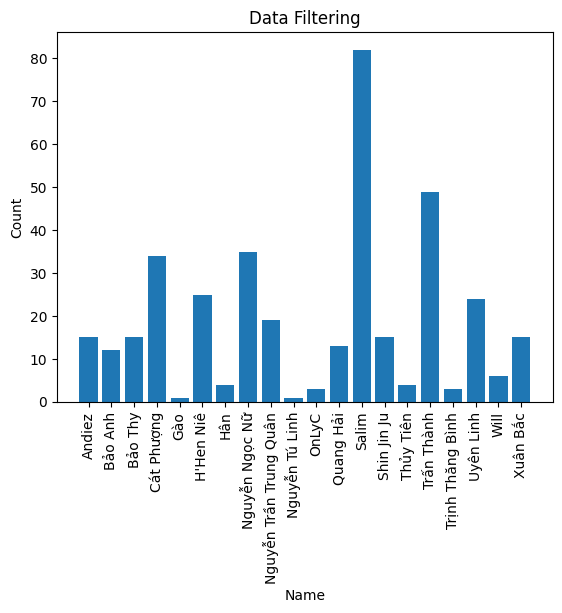

In [19]:
plot_bar_data('Name','Count','Data Filtering', count_filtered)

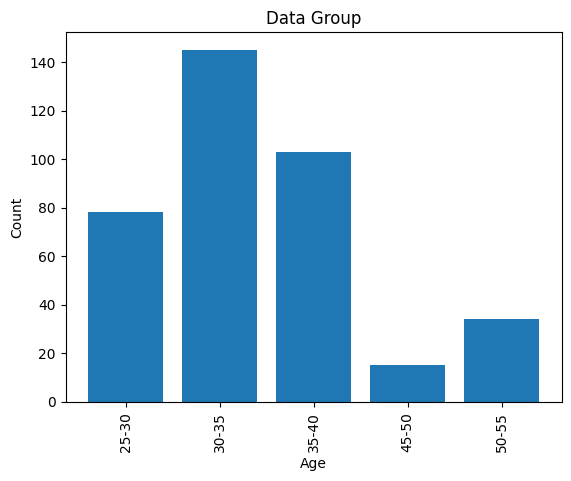

In [14]:
plot_bar_data('Age','Count','Data Group', dict(sorted(count_follow_age.items(), key=lambda item: item[0])))